In [25]:
# Dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [82]:
unfilteredData = pd.read_csv('Resources/WMT.csv')
unfilteredData.head()

,date,open,high,low,close,volume,unadjustedVolume,change,changePercent,vwap,label,changeOverTime
0,2014-01-27,64.7650,64.9747,64.5029,64.7825,9105139,9105139,-0.235889,-0.363,64.7739,"Jan 27, 14",0.000000
1,2014-01-28,64.8786,65.8746,64.7388,65.2368,6035231,6035231,0.454305,0.701,65.3045,"Jan 28, 14",0.007013
2,2014-01-29,65.7785,65.8484,64.7126,64.7388,8440854,8440854,-0.497990,-0.763,61.0517,"Jan 29, 14",-0.000675
3,2014-01-30,65.1232,65.6037,64.9660,65.3067,6742046,6742046,0.567883,0.877,65.2975,"Jan 30, 14",0.008092
4,2014-01-31,64.5816,65.6911,64.3369,65.2455,10665285,10665285,-0.061155,-0.094,65.3223,"Jan 31, 14",0.007147


In [83]:
unfilteredData = unfilteredData.drop(columns=["volume", "unadjustedVolume", "change", "changePercent", "vwap", "label", "changeOverTime"])
unfilteredData.head()

,date,open,high,low,close
0,2014-01-27,64.7650,64.9747,64.5029,64.7825
1,2014-01-28,64.8786,65.8746,64.7388,65.2368
2,2014-01-29,65.7785,65.8484,64.7126,64.7388
3,2014-01-30,65.1232,65.6037,64.9660,65.3067
4,2014-01-31,64.5816,65.6911,64.3369,65.2455


In [84]:
lastIndex = len(unfilteredData)
print(lastIndex)

1259


In [85]:
startDate = unfilteredData.loc[unfilteredData["date"] == "2016-06-01"]
startDateIndex = startDate.index.tolist()
print(startDateIndex[0])

591


In [86]:
endDateTrain = unfilteredData.loc[unfilteredData["date"] == "2018-06-01"]
endDateTrainIndex = endDateTrain.index.tolist()
print(endDateTrainIndex[0])

1095


In [87]:
filteredData = unfilteredData.loc[startDateIndex[0]:lastIndex]

In [99]:
filteredData.head()

,date,open,high,low,close
0,2016-06-01,65.8547,66.2330,65.7706,65.8547
1,2016-06-02,65.8547,66.3217,65.5231,66.2750
2,2016-06-03,65.9201,66.3684,65.8733,66.2003
3,2016-06-06,66.8075,66.8355,66.3217,66.3684
4,2016-06-07,66.4151,66.6113,66.1816,66.3497


In [100]:
filteredData.reset_index(inplace=True, drop=True)
filteredData.head()

,date,open,high,low,close
0,2016-06-01,65.8547,66.2330,65.7706,65.8547
1,2016-06-02,65.8547,66.3217,65.5231,66.2750
2,2016-06-03,65.9201,66.3684,65.8733,66.2003
3,2016-06-06,66.8075,66.8355,66.3217,66.3684
4,2016-06-07,66.4151,66.6113,66.1816,66.3497


In [101]:
filteredData.shape

(668, 5)

In [110]:
# add a new variable that moves tomorrow's close up by one value
# so we have both today's close and tomorrow's close
# this would help with predictions
tomorrow_close = filteredData.close.values[1:]
tomorrow_close.shape

RangeIndex(start=0, stop=668, step=1)

In [112]:

filteredData.drop(667, inplace=True)

C:\Users\Meenakshi\Anaconda\Anaconda3\lib\site-packages\pandas\core\frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [113]:
filteredData['tomorrow_close'] = tomorrow_close
filteredData.head()

C:\Users\Meenakshi\Anaconda\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,date,open,high,low,close,tomorrow_close
0,2016-06-01,65.8547,66.2330,65.7706,65.8547,66.2750
1,2016-06-02,65.8547,66.3217,65.5231,66.2750,66.2003
2,2016-06-03,65.9201,66.3684,65.8733,66.2003,66.3684
3,2016-06-06,66.8075,66.8355,66.3217,66.3684,66.3497
4,2016-06-07,66.4151,66.6113,66.1816,66.3497,66.5833


In [114]:
filteredData.head()

,date,open,high,low,close,tomorrow_close
0,2016-06-01,65.8547,66.2330,65.7706,65.8547,66.2750
1,2016-06-02,65.8547,66.3217,65.5231,66.2750,66.2003
2,2016-06-03,65.9201,66.3684,65.8733,66.2003,66.3684
3,2016-06-06,66.8075,66.8355,66.3217,66.3684,66.3497
4,2016-06-07,66.4151,66.6113,66.1816,66.3497,66.5833


In [115]:
movingAverageData = pd.DataFrame(index=range(0,len(filteredData)),columns=['date', 'close'])
for i in range(0,len(filteredData)):
    movingAverageData['date'][i] = filteredData['date'][i]
    movingAverageData['close'][i] = filteredData['close'][i]
movingAverageData.head()

,date,close
0,2016-06-01,65.8547
1,2016-06-02,66.275
2,2016-06-03,66.2003
3,2016-06-06,66.3684
4,2016-06-07,66.3497


In [116]:
trainEndIndex = endDateTrainIndex[0] - startDateIndex[0]
print(trainEndIndex)

504


In [117]:
movingAverageTrainData = movingAverageData.loc[:(trainEndIndex-1)]
movingAverageTrainData.head()

,date,close
0,2016-06-01,65.8547
1,2016-06-02,66.275
2,2016-06-03,66.2003
3,2016-06-06,66.3684
4,2016-06-07,66.3497


In [118]:
movingAverageTestData = movingAverageData.loc[trainEndIndex:]
movingAverageTestData.head()

,date,close
504,2018-06-01,82.0629
505,2018-06-04,84.4658
506,2018-06-05,83.6747
507,2018-06-06,83.6154
508,2018-06-07,84.0011


In [119]:
movingAverageData.shape, movingAverageTrainData.shape, movingAverageTestData.shape 

((667, 2), (504, 2), (163, 2))

In [120]:
movingAverageTrainData['date'].min(), movingAverageTrainData['date'].max(), movingAverageTestData['date'].min(), movingAverageTestData['date'].max()

('2016-06-01', '2018-05-31', '2018-06-01', '2019-01-24')

In [121]:
#make predictions
preds = []
for i in range(0,len(movingAverageTestData)):
    a = movingAverageTestData['close'][len(movingAverageTestData)-len(movingAverageTestData)+i:].sum() + sum(preds)
    b = a/len(movingAverageTestData)
    preds.append(b)

In [122]:
#calculate rmse
rms=np.sqrt(np.mean(np.power((np.array(movingAverageTestData['close'])-preds),2)))
rms

5.442430405513891

C:\Users\Meenakshi\Anaconda\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Meenakshi\Anaconda\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


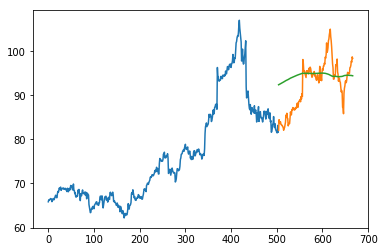

In [123]:
#plot
movingAverageTestData['Predictions'] = 0
movingAverageTestData['Predictions'] = preds
plt.plot(movingAverageTrainData['close'])
plt.plot(movingAverageTestData[['close', 'Predictions']])

In [124]:
deepLearningTrainData = movingAverageTrainData
deepLearningTrainData.head()

,date,close
0,2016-06-01,65.8547
1,2016-06-02,66.275
2,2016-06-03,66.2003
3,2016-06-06,66.3684
4,2016-06-07,66.3497


In [125]:
deepLearningTestData = movingAverageTestData
deepLearningTestData.head()

,date,close,Predictions
504,2018-06-01,82.0629,92.384780
505,2018-06-04,84.4658,92.448104
506,2018-06-05,83.6747,92.497075
507,2018-06-06,83.6154,92.551200
508,2018-06-07,84.0011,92.606021


In [126]:
filteredData.head()

,date,open,high,low,close,tomorrow_close
0,2016-06-01,65.8547,66.2330,65.7706,65.8547,66.2750
1,2016-06-02,65.8547,66.3217,65.5231,66.2750,66.2003
2,2016-06-03,65.9201,66.3684,65.8733,66.2003,66.3684
3,2016-06-06,66.8075,66.8355,66.3217,66.3684,66.3497
4,2016-06-07,66.4151,66.6113,66.1816,66.3497,66.5833


# Keras Part:

In [127]:
from keras.models import Sequential

model = Sequential()


In [147]:
from keras.layers import Dense

model.add(Dense(units=64, activation='relu', input_dim=4))
model.add(Dense(64, activation='tanh'))
model.add(Dense(units=1, activation='relu'))


In [148]:
model.compile(loss='mean_squared_error',
              optimizer='adam',
              metrics=['mae', 'acc'])

In [149]:
#target array
y = filteredData.pop('tomorrow_close')
y.head()

KeyError: 'tomorrow_close'

In [150]:
filteredData.columns

Index(['date', 'open', 'high', 'low', 'close'], dtype='object')

In [153]:
X = filteredData[['open', 'close']]

In [154]:
model.fit(X, y, epochs =3, validation_split =0.2)

ValueError: Error when checking input: expected dense_7_input to have shape (4,) but got array with shape (2,)

In [136]:
model.evaluate(X, y, verbose=1)

667/667 [==============================] - 0s 16us/step


[6582.219808552755, 80.22663108448218, 0.0]

In [146]:
prediction = model.predict(movingAverageTestData, batch_size = 32, verbose = 1)

ValueError: Error when checking input: expected dense_7_input to have shape (4,) but got array with shape (3,)

In [145]:
prediction[50]

array([0.], dtype=float32)